# Despliege de datos

## Importar librerías

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import pickle

import warnings
warnings.filterwarnings("ignore")


## Importar set de datos

In [110]:
heart = pd.read_csv('data.csv')

# Desplegar datos importados
heart.head()

,edad,sexo,dolor_pecho,ppm_reposo,nvl_colest,nvl_az_reposo120mg_dl,ecg_reposo,rcard_max,ang_ejer,oldpeak,pendiente,vias_fluor,thal,salida
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [111]:
# Imprimir dimensiones del set de datos (14 parámetros, 270 casos)
heart.shape

(270, 14)

In [112]:
# Desplegar parámetros
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
edad                     270 non-null int64
sexo                     270 non-null int64
dolor_pecho              270 non-null int64
ppm_reposo               270 non-null int64
nvl_colest               270 non-null int64
nvl_az_reposo120mg_dl    270 non-null int64
ecg_reposo               270 non-null int64
rcard_max                270 non-null int64
ang_ejer                 270 non-null int64
oldpeak                  270 non-null float64
pendiente                270 non-null int64
vias_fluor               270 non-null int64
thal                     270 non-null int64
salida                   270 non-null int64
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [113]:
# Desplegar estadísticos generales
heart.describe()

,edad,sexo,dolor_pecho,ppm_reposo,nvl_colest,nvl_az_reposo120mg_dl,ecg_reposo,rcard_max,ang_ejer,oldpeak,pendiente,vias_fluor,thal,salida
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [114]:
# Verificar que no exista un valor nulo
heart.isnull().sum()

edad                     0
sexo                     0
dolor_pecho              0
ppm_reposo               0
nvl_colest               0
nvl_az_reposo120mg_dl    0
ecg_reposo               0
rcard_max                0
ang_ejer                 0
oldpeak                  0
pendiente                0
vias_fluor               0
thal                     0
salida                   0
dtype: int64

In [115]:
# Contar la cantidad de gente que no cuenta con ECV (1) y gente que sí cuenta
# con ECV (2)
heart['salida'].value_counts()

1    150
2    120
Name: salida, dtype: int64

In [116]:
# Pasar el conteo anterior a porcentajes
heart['salida'].value_counts()/heart.shape[0]*100

1    55.555556
2    44.444444
Name: salida, dtype: float64

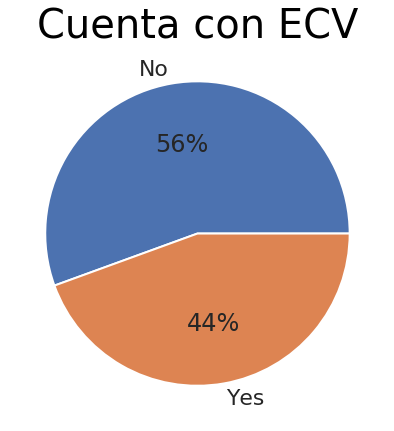

In [117]:
# Creación de gráfico para desplegar la información
labels=['No','Yes']
values=heart['salida'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(7,7))
plt.title('Cuenta con ECV', color="Black",fontsize=40)

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

## Correlación entre variables

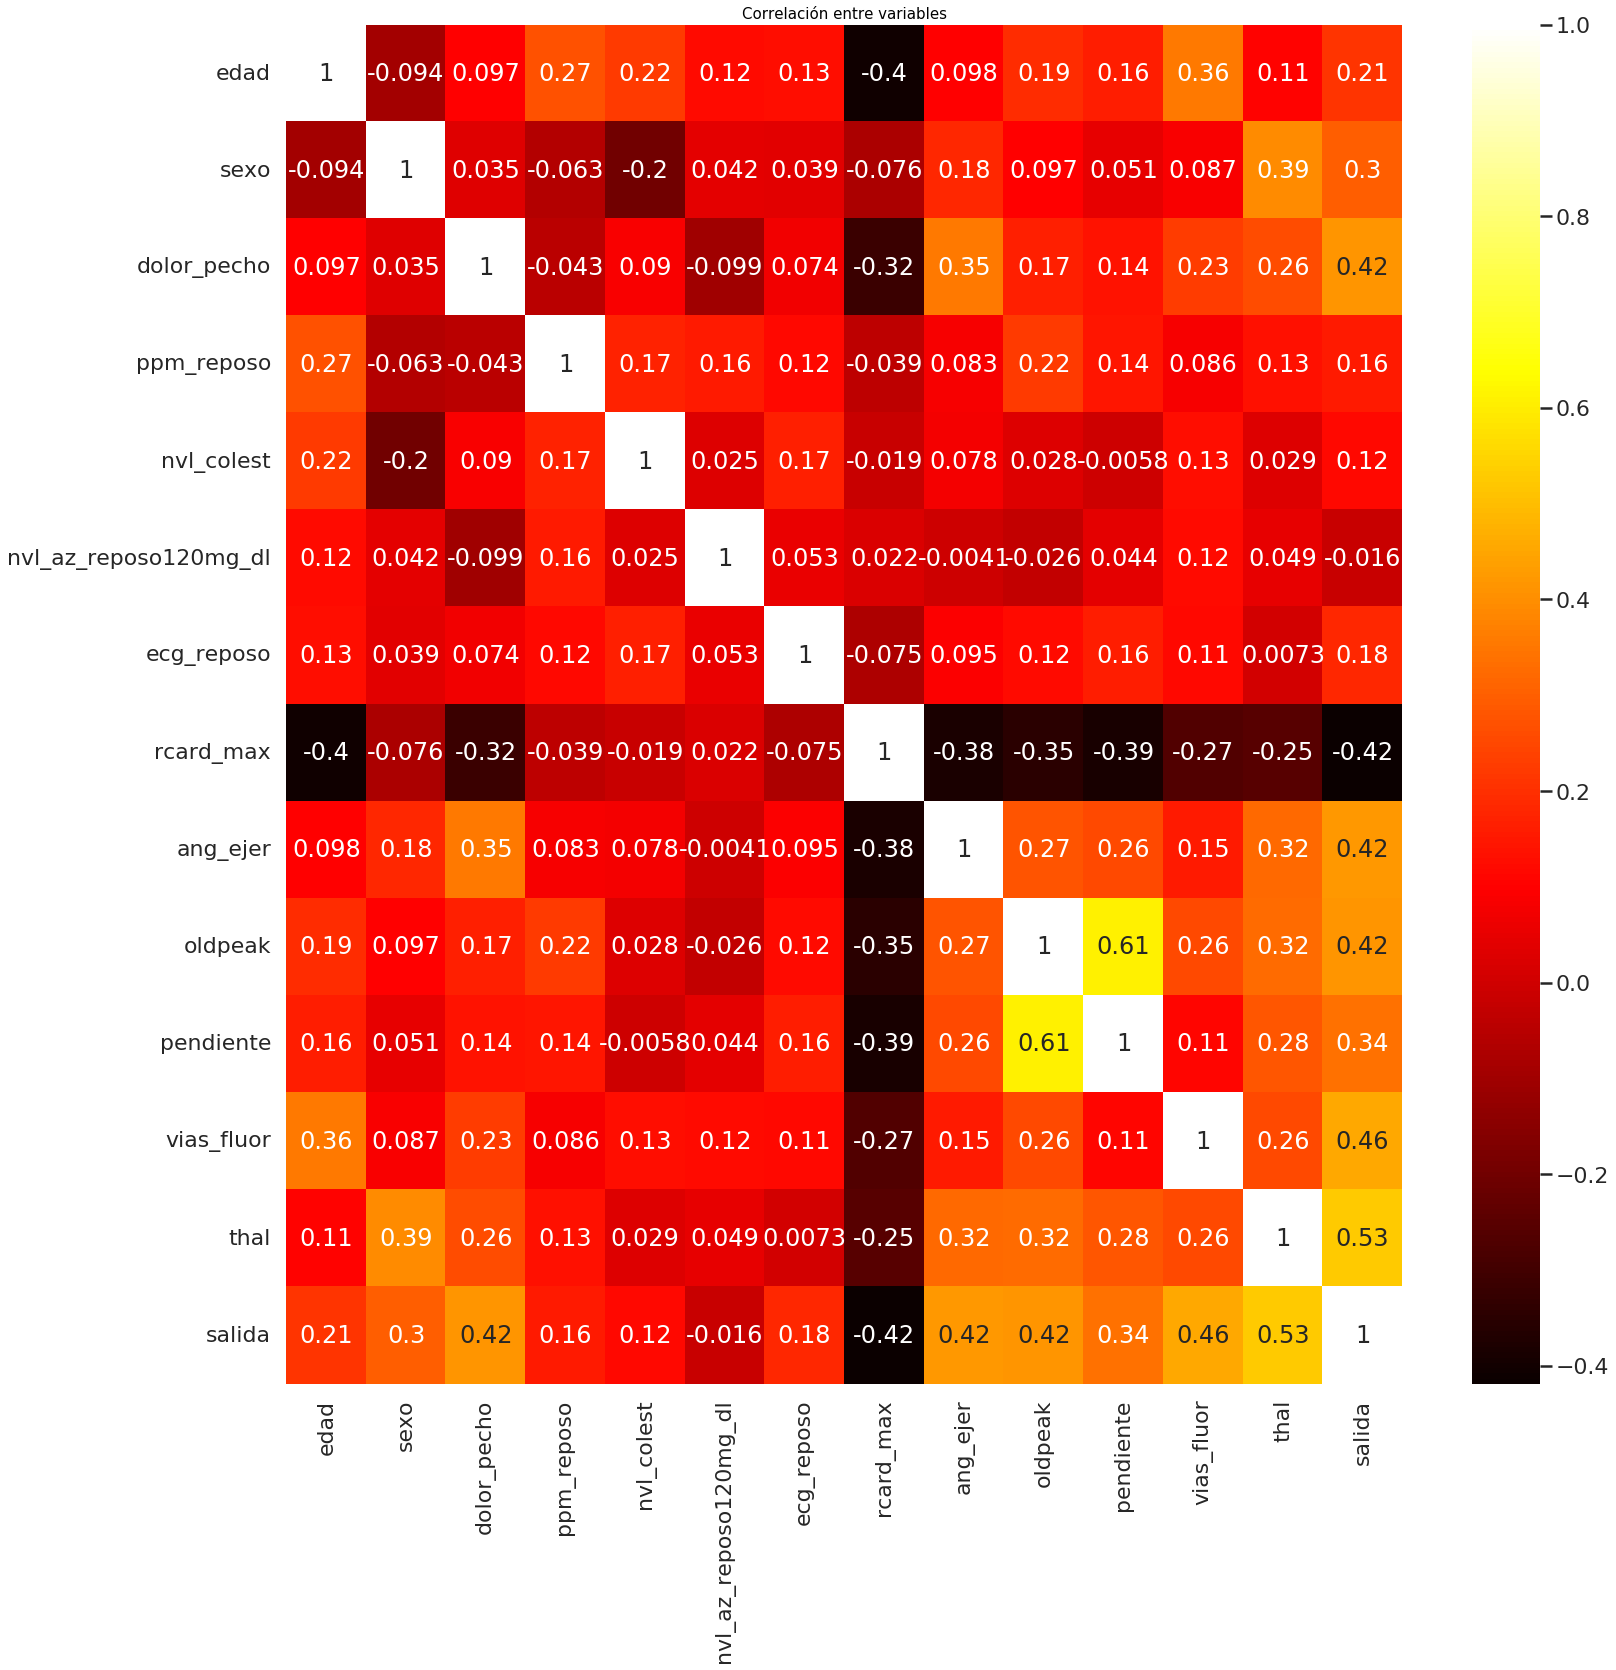

In [118]:
# Despliegue de correlación como mapa de calor
sns.set_theme(context='poster')
plt.figure(figsize=(25,25))
plt.title('Correlación entre variables', color="Black",fontsize=15)
sns.heatmap(heart.corr(),annot=True,cmap="hot")
plt.show()

## Edades

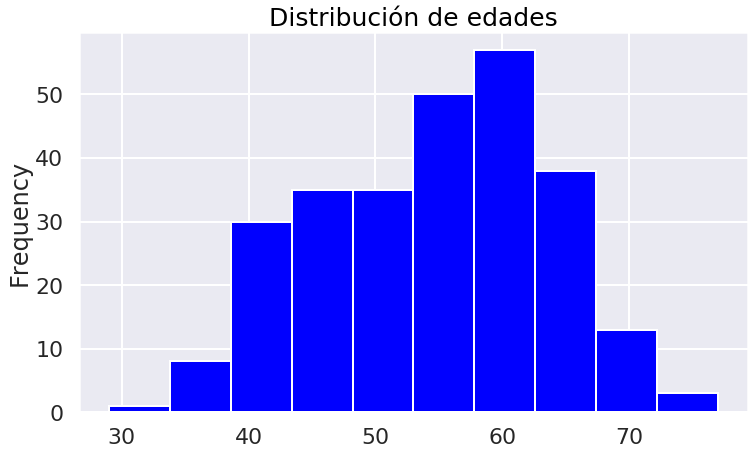

In [119]:
# Histograma de edades
sns.set_theme(context='poster')
plt.figure(figsize=(12,7))
plt.title('Distribución de edades', color="Black",fontsize=25)
heart['edad'].plot(kind = 'hist',color='blue')
plt.show()

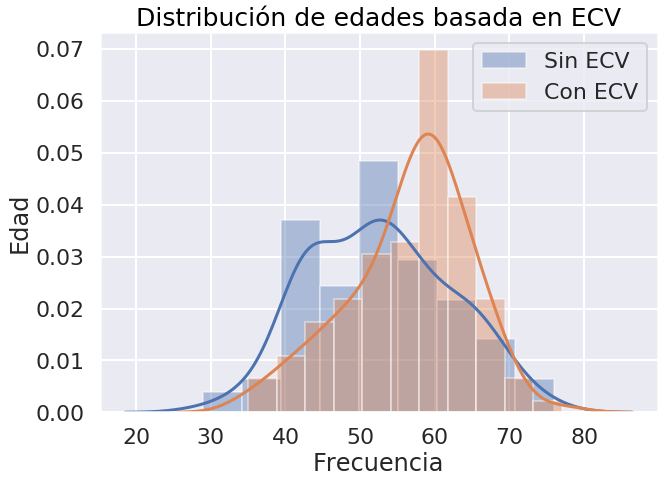

In [120]:
# Histograma de edades (gente con ECV vs gente sin ECV)


sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Distribución de edades basada en ECV', color="Black",fontsize=25)

sns.distplot(heart[heart['salida'] == 1]['edad'], label='Sin ECV')
sns.distplot(heart[heart['salida'] == 2]['edad'], label = 'Con ECV')
plt.xlabel('Frecuencia')
plt.ylabel('Edad')
plt.legend()
plt.show()



## Sexo

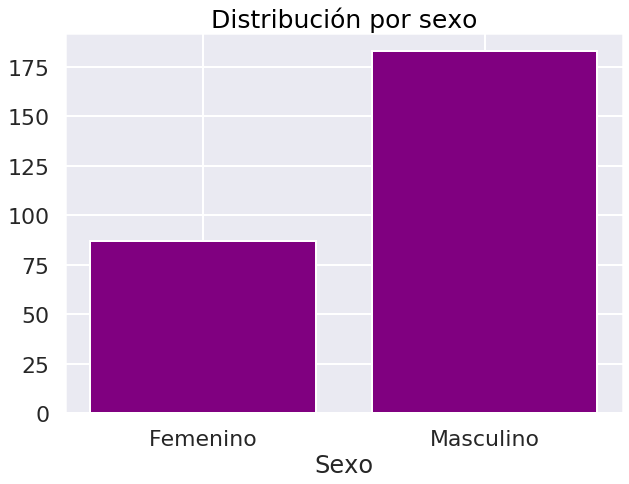

In [121]:
sns.set_theme(context='poster')
# Number of males and females
F = heart[heart['sexo'] == 0].count()['salida']
M = heart[heart['sexo'] == 1].count()['salida']

# Create a plot
figure, ax = plt.subplots(figsize = (10, 7))
ax.bar(x = ['Femenino', 'Masculino'], height = [F, M],color='purple')
plt.xlabel('Sexo')
plt.title('Distribución por sexo', color="Black",fontsize=25)
plt.show()

## Otras variables

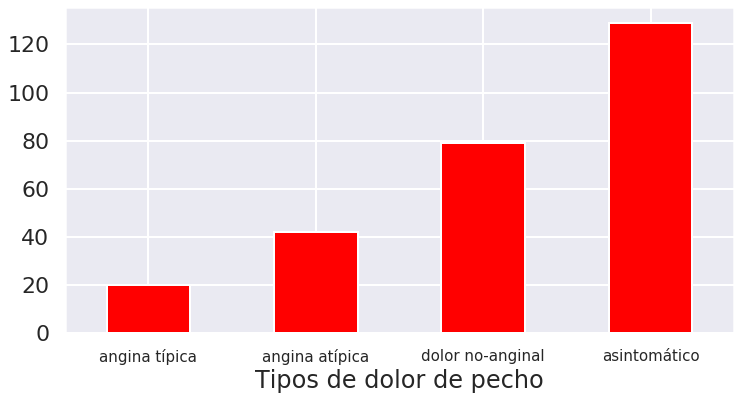

In [122]:
# Dolor de pecho
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
xs =[0,1,2,3]
labels = ['angina típica', 'angina atípica', 'dolor no-anginal', 'asintomático']

heart.groupby(heart['dolor_pecho']).count()['salida'].plot(kind = 'bar', figsize = (12, 6),color='red')
plt.xlabel('Tipos de dolor de pecho')
plt.xticks(np.arange(4), ('angina típica', 'angina atípica', 'dolor no-anginal', 'asintomático'), rotation = 0)
plt. xticks(xs,labels)
plt.show()

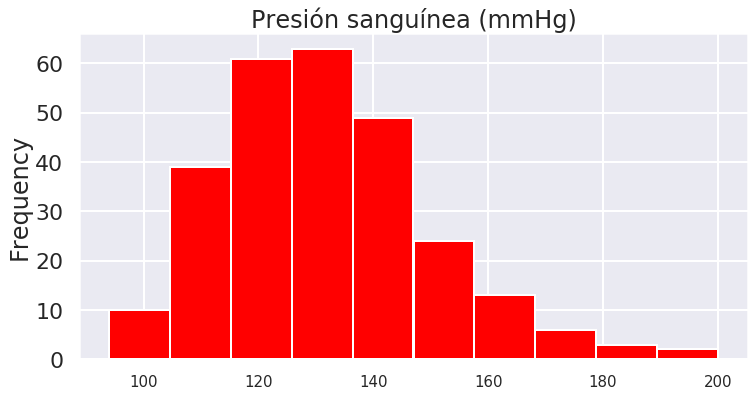

In [123]:
# Presión sanguínea
heart['ppm_reposo'].plot(kind = 'hist', title = 'Presión sanguínea (mmHg)', figsize = (12, 6), color='red')
plt.show()

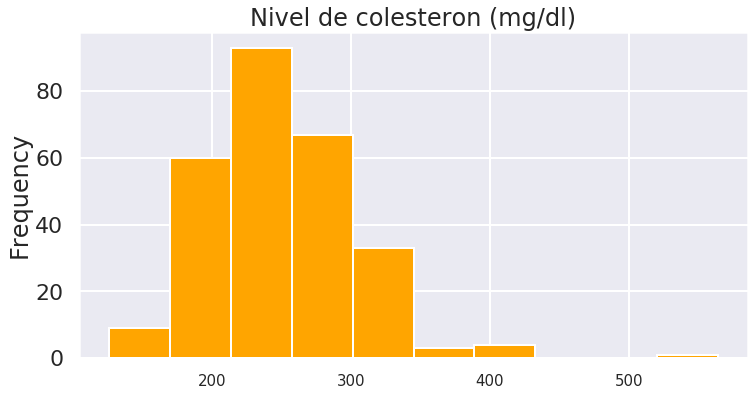

In [124]:
# Distribución por niveles de colesterol
heart['nvl_colest'].plot(kind = 'hist', title = 'Nivel de colesteron (mg/dl)', figsize = (12, 6), color='orange')
plt.show()

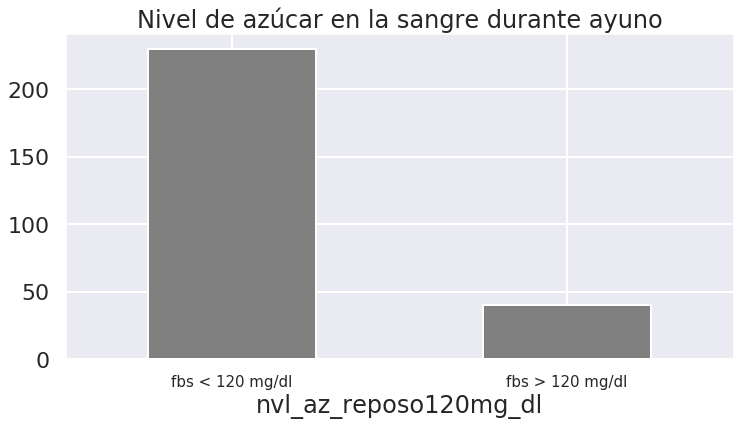

In [125]:
# Niveles de azúcar en la sangre en ayuno
heart.groupby(heart['nvl_az_reposo120mg_dl']).count()['salida'].plot(kind = 'bar', title = 'Nivel de azúcar en la sangre durante ayuno', figsize = (12, 6), color='gray')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

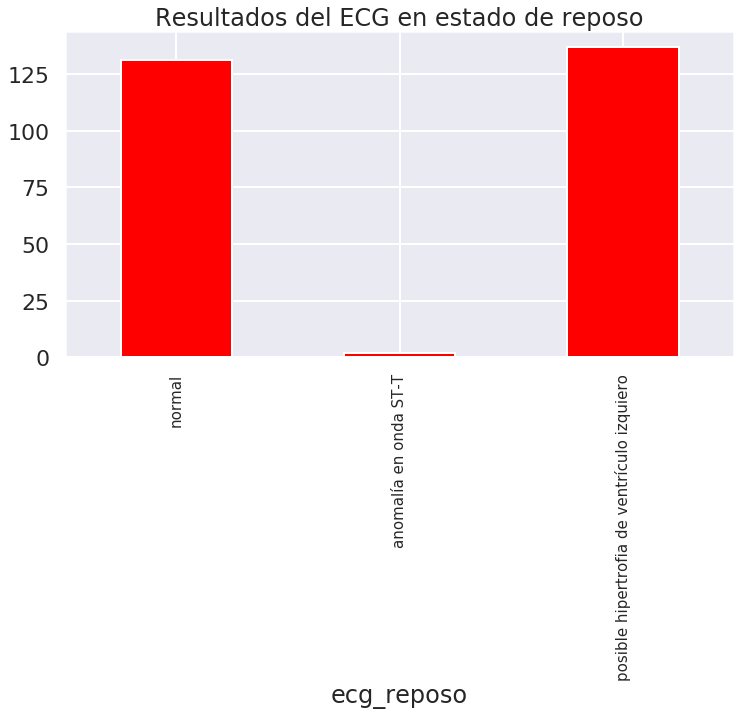

In [126]:
# Resultados de ECG
heart.groupby(heart['ecg_reposo']).count()['salida'].plot(kind = 'bar', title = 'Resultados del ECG en estado de reposo', figsize = (12, 6), color='red')
plt.xticks(np.arange(3), ('normal', 'anomalía en onda ST-T', 'posible hipertrofia de ventrículo izquiero'))
plt.show()

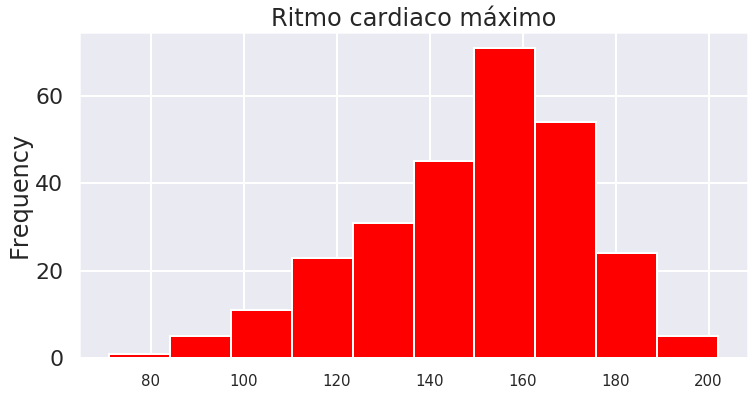

In [127]:
# Distribución por ritmo cardiaco
heart['rcard_max'].plot(kind = 'hist', title = 'Ritmo cardiaco máximo', figsize = (12, 6), color='red')
plt.show()

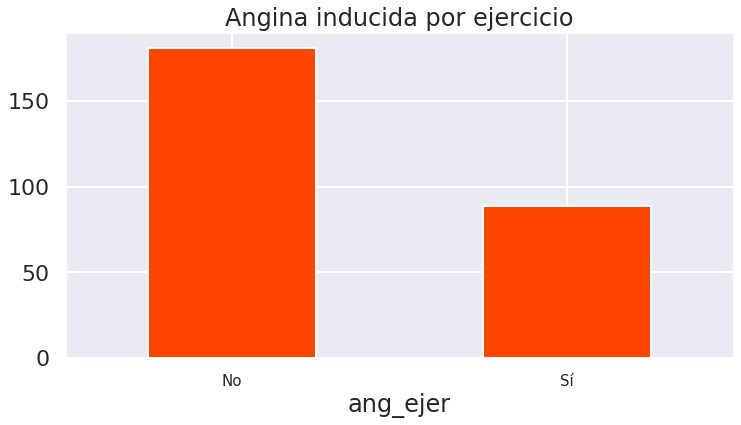

In [128]:
# Angina inducida por ejercicio
heart.groupby(heart['ang_ejer']).count()['salida'].plot(kind = 'bar', title = 'Angina inducida por ejercicio',  figsize = (12, 6), color='orangered')
plt.xticks(np.arange(2), ('No', 'Sí'), rotation = 0)
plt.show()

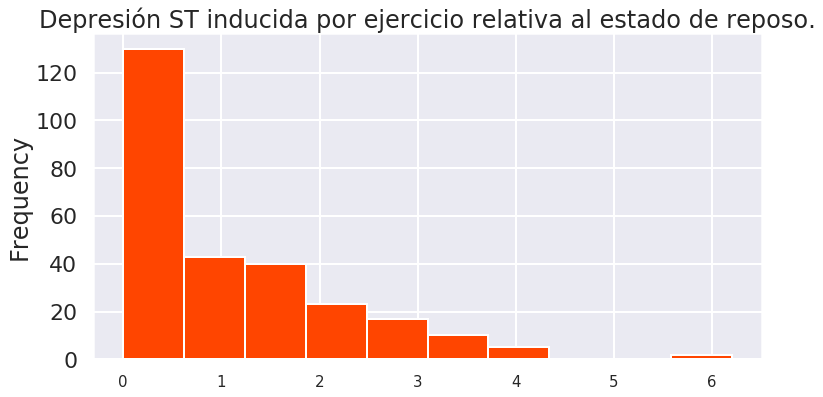

In [129]:
# Depresión ST inducida por ejercicio relativa al estado de reposo
heart['oldpeak'].plot(kind = 'hist', title = 'Depresión ST inducida por ejercicio relativa al estado de reposo.', figsize = (12, 6), color='orangered')
plt.show()

In [130]:
heart['pendiente'].value_counts()

1    130
2    122
3     18
Name: pendiente, dtype: int64

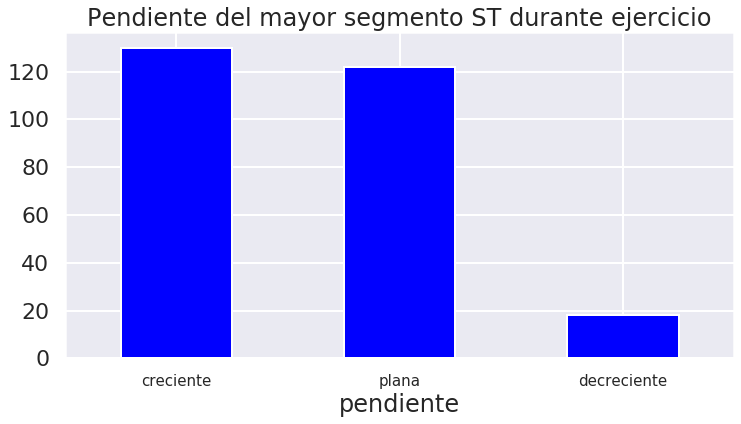

In [131]:
# Desplegar pendiente del mayor segmento ST durante ejercicio
matplotlib.rc('xtick', labelsize=15) 
xs =[0,1,2]
labels = ['creciente', 'plana', 'decreciente']

heart.groupby(heart['pendiente']).count()['salida'].plot(kind = 'bar', title = 'Pendiente del mayor segmento ST durante ejercicio', figsize = (12, 6), color='blue')
plt.xticks(np.arange(3), ('creciente', 'plana', 'decreciente'), rotation = 0)
plt. xticks(xs,labels)
plt.show()

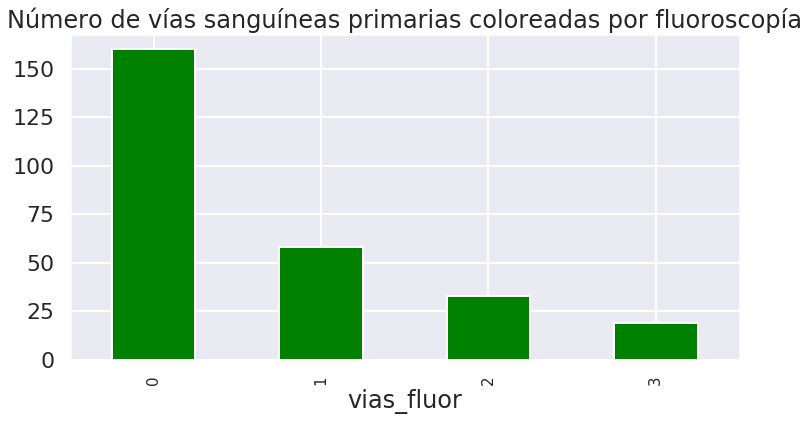

In [132]:
# Número de vías sanguíneas primarias coloreadas por fluoroscopía
heart.groupby(heart['vias_fluor']).count()['salida'].plot(kind = 'bar', title = 'Número de vías sanguíneas primarias coloreadas por fluoroscopía', figsize = (12, 6), color='green')
plt.show()


In [133]:
heart['thal'].value_counts()

3    152
7    104
6     14
Name: thal, dtype: int64

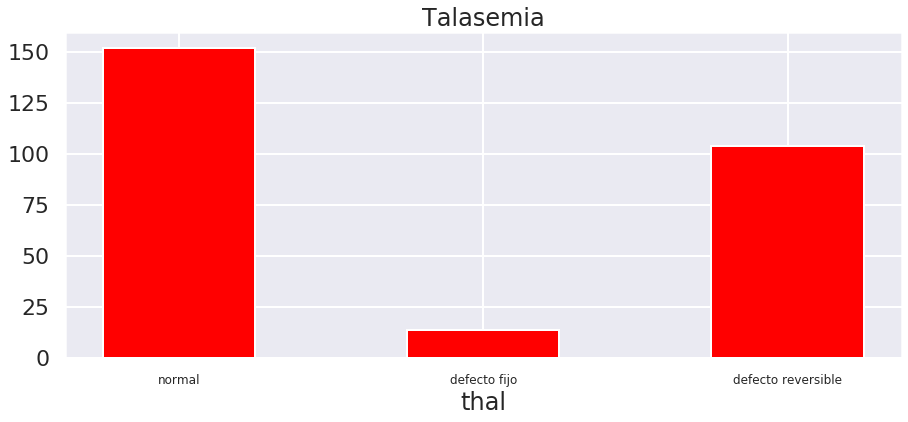

In [134]:
# Desplegar talasemia
matplotlib.rc('xtick', labelsize=12) 
xs =[0,1,2]
labels = ['normal', 'defecto fijo', 'defecto reversible']

heart.groupby(heart['thal']).count()['salida'].plot(kind = 'bar', title = 'Talasemia', figsize=(15,6), color='red')
plt.xticks(np.arange(3), ('normal', 'defecto fijo', 'defecto reversible'), rotation = 0)
plt.xticks(xs,labels)
plt.autoscale(enable=True)
plt.show()

## **Correlaciones**

Edad - ritmo cardiaco

Edad - Vías coloreadas por fluoroscopía

Salida - Pendiente - Oldpeak


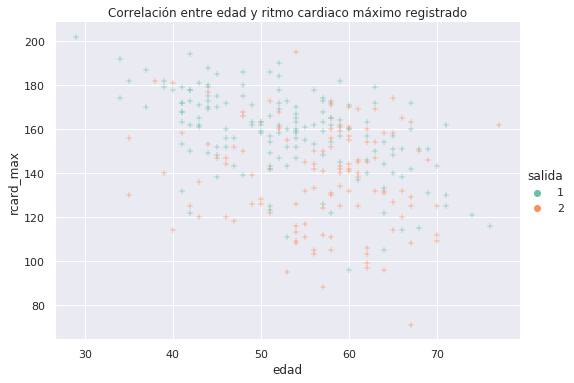

In [135]:
# Edad - ritmo cardiaco
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

sns.relplot(x = 'edad', y = 'rcard_max', data = heart, hue = 'salida', legend="full", palette="Set2",marker="+",color="g",height=5.27, aspect=11.7/8.27)
plt.title('Correlación entre edad y ritmo cardiaco máximo registrado')
plt.show()

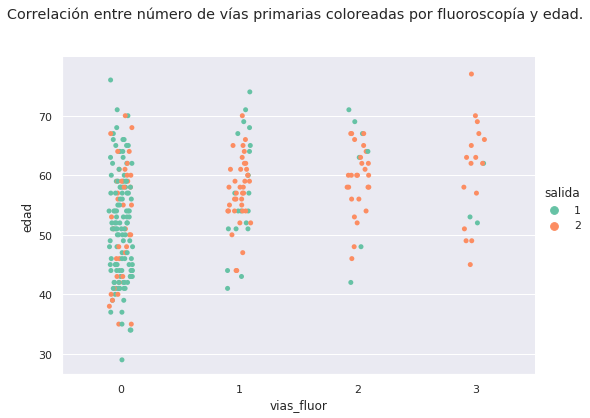

In [136]:
# Edad - Vías coloreadas por fluoroscopía
g = sns.catplot(x = 'vias_fluor', y = 'edad', hue = 'salida', data = heart, palette="Set2",height=5.27, aspect=11.7/8.27)
g.fig.suptitle('Correlación entre número de vías primarias coloreadas por fluoroscopía y edad.', y = 1.1)
plt.show()

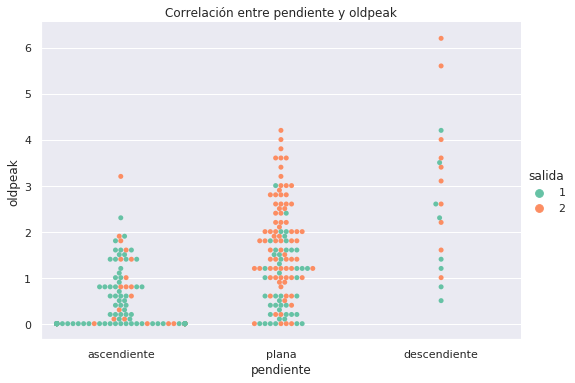

In [137]:
# Salida, pendiente y Oldpeak
sns.catplot(x = "pendiente", y = "oldpeak", hue = "salida", data = heart, height=5.27, palette="Set2",kind="swarm",aspect=11.7/8.27)
plt.title('Correlación entre pendiente y oldpeak')
plt.xticks(np.arange(3), ('ascendiente', 'plana', 'descendiente'), rotation = 0)
plt.show()

# Modelado

In [138]:
# Inicializar datos y salida
target = heart['salida']
features = heart.drop(['salida'], axis = 1)

In [139]:
# Dividir los datos entre sets de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [140]:
# Entrenamiento y validación del modelo
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [141]:
# Inicializar los modelos
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)

In [142]:
# Ajustar y evaluar modelos
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [143]:
# Desplegar resultados de los clasificadores
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           1       0.71      0.90      0.79        30
           2       0.81      0.54      0.65        24

    accuracy                           0.74        54
   macro avg       0.76      0.72      0.72        54
weighted avg       0.76      0.74      0.73        54


confusion_matrix :
[[27  3]
 [11 13]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54


confusion_matrix :
[[22  8]
 [ 7 17]]

-----

AdaBoostClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.75      0.80      0.77        30
           2       0.7

In [144]:
# Inicializar los modelos
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)

In [145]:
# Ajustar y evaluar modelos
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

Feature: edad, Score: 0.06003
Feature: sexo, Score: 0.01170
Feature: dolor_pecho, Score: 0.28587
Feature: ppm_reposo, Score: 0.03719
Feature: nvl_colest, Score: 0.06027
Feature: nvl_az_reposo120mg_dl, Score: 0.00082
Feature: ecg_reposo, Score: 0.00376
Feature: rcard_max, Score: 0.06526
Feature: ang_ejer, Score: 0.02465
Feature: oldpeak, Score: 0.13452
Feature: pendiente, Score: 0.04946
Feature: vias_fluor, Score: 0.17047
Feature: thal, Score: 0.09600


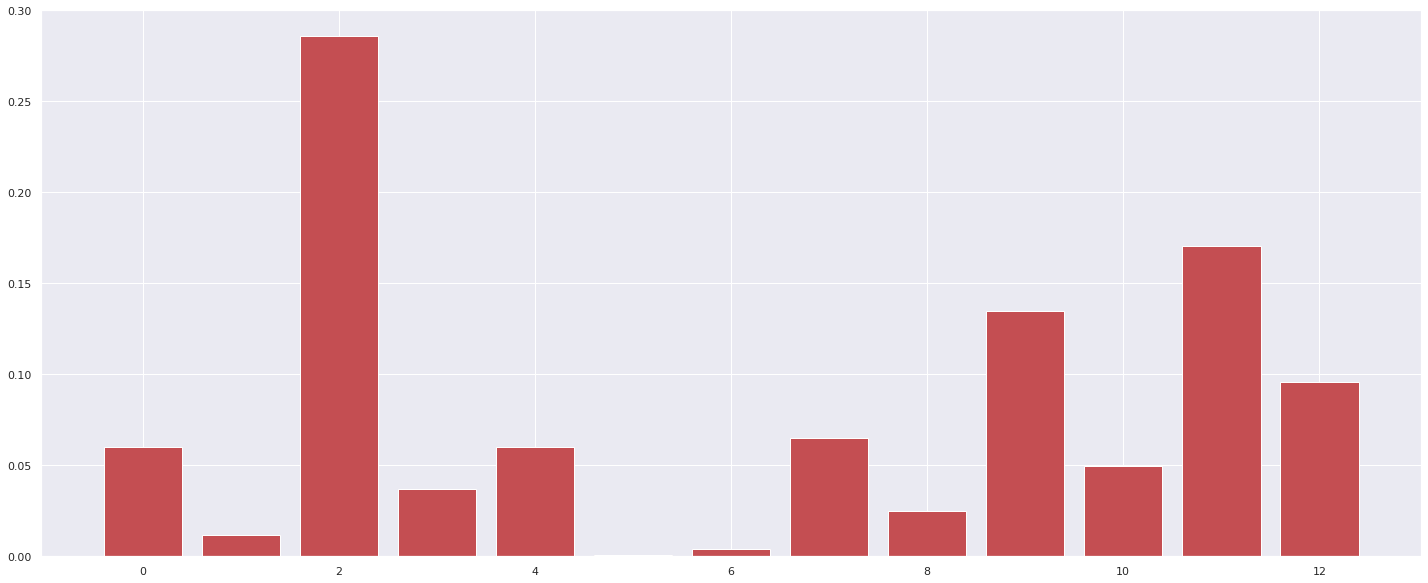

In [146]:
# Obtener las características importantes
importance = gb.feature_importances_
# Resumir importancia de parámetros
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# Graficar la importancia de los parámetros
plt.bar([x for x in range(len(importance))], importance, color='r')
plt.tight_layout()
plt.show()

In [147]:
# Guardar el modelo como un objeto pickle serializado
with open('model_heart.pkl', 'wb') as file:
    pickle.dump(sv, file)

# Flask Web App

In [148]:
import numpy as np
import pickle
from flask import Flask, request, render_template

In [149]:
model = pickle.load(open('model_heart.pkl', 'rb'))  # Cargar el modelo de machine learning

app = Flask(__name__)   # Crear ambiente con Flask

@app.route('/')
def home():
    return render_template('index.html')

In [150]:
@app.route('/predict', methods =['POST'])
def predict():

    # Poner todos los valores de las variables en una lista
    features = [float(i) for i in request.form.values()]
    # Convierte los atributos en un arreglo
    array_features = [np.array(features)]
    # Predecir atributos
    prediction = model.predict(array_features)

    output = prediction

    # Checa el valor de la salida. Si es 1, el usuario no es propenso; si es 2, lo es.
    if output == 1:
        return render_template('/index.html', 
                              result = 'ECV: poco probable, ¡pero no bajes la guardia!')
    else:
        return render_template('/index.html', 
                              result = 'ECV: probable. Consulta con tu especialista y déjanos tus datos de contacto.')



In [151]:
app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
